In [1]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [30]:
img = cv2.imread(r'C:\Users\abely\OneDrive\Desktop\tomography\tom_snimki\3660.20-3660.95_01004.bmp')
#img = cv2.imread(r'C:\Users\abely\OneDrive\Desktop\tomography\tom_snimki\3660.20-3660.95_01011.bmp')

# Создаём копию изначального изображения
img_cont = img.copy()

# Переводим изначальное изображение img в серый канал (с этим методом
# мы познакомились выше) и сохраняем в переменной gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Производим изменение размерности в 4 раза (изменение размерности производится
# в пикселях) относительно изначальной картинки img и сохраняем полученное 
# изображение в переменной img_resize
img_resize = cv2.resize(img, (int(img.shape[1] / 4), int(img.shape[0] / 4)))

# Далее идёт большой блок кода, в котором мы создаём 
# алгоритм детектирования краёв Canny Edge Detector (с этим методом
# мы познакомились выше) 
canny_1 = 200
canny_2 = 225
canny = cv2.Canny(img, canny_1, canny_2)
contours, hierarchy = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
min_black = 255
cnt_black = []

for cnt in contours:
    c_area = cv2.contourArea(cnt) + 1e-7
    if cv2.contourArea(cnt) + 1e-7 > 500:
        cv2.drawContours(img_cont, [cnt], -1, 3)
        mask = np.zeros_like(gray)
        cv2.drawContours(mask, [cnt], -1, (255,255,255), -1)
        temp_mask = cv2.bitwise_and(gray, mask)
        temp_col = np.sum(temp_mask).real/(cv2.contourArea(cnt)+1e-7)
        if (temp_col < min_black) or (len(cnt_black) == 0):
            cnt_black = cnt
            min_black = temp_col

if len(cnt_black)!=0:
    cv2.drawContours(img_cont, [cnt_black], -1, (0,0,255), 3)

In [1]:
import cv2

# Считываем изображение
image = cv2.imread(r'C:\Users\abely\OneDrive\Desktop\tomography\tom_snimki\3660.20-3660.95_01004.bmp')

# Отображаем изображение
cv2.imshow('Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
img = cv2.imread(r'C:\Users\abely\OneDrive\Desktop\tomography\tom_snimki\3660.20-3660.95_01004.bmp')
#img = cv2.imread(r'C:\Users\abely\OneDrive\Desktop\tomography\tom_snimki\3660.20-3660.95_01011.bmp')

# Создаём копию изначального изображения
img_cont = img.copy()

# Переводим изначальное изображение img в серый канал (с этим методом
# мы познакомились выше) и сохраняем в переменной gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Производим изменение размерности в 4 раза (изменение размерности производится
# в пикселях) относительно изначальной картинки img и сохраняем полученное 
# изображение в переменной img_resize
img_resize = cv2.resize(img, (int(img.shape[1] / 4), int(img.shape[0] / 4)))

# Далее идёт большой блок кода, в котором мы создаём 
# алгоритм детектирования краёв Canny Edge Detector (с этим методом
# мы познакомились выше) 
canny_1 = 200
canny_2 = 225
canny = cv2.Canny(img, canny_1, canny_2)
contours, hierarchy = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
min_black = 255
cnt_black = []

for cnt in contours:
    c_area = cv2.contourArea(cnt) + 1e-7
    if cv2.contourArea(cnt) + 1e-7 > 500:
        cv2.drawContours(img_cont, [cnt], -1, 3)
        mask = np.zeros_like(gray)
        cv2.drawContours(mask, [cnt], -1, (255,255,255), -1)
        temp_mask = cv2.bitwise_and(gray, mask)
        temp_col = np.sum(temp_mask).real/(cv2.contourArea(cnt)+1e-7)
        if (temp_col < min_black) or (len(cnt_black) == 0):
            cnt_black = cnt
            min_black = temp_col

if len(cnt_black)!=0:
    cv2.drawContours(img_cont, [cnt_black], -1, (0,0,255), 3)

In [31]:
# Сохранение результатов работы нашей программы в папку


# Сохранение изображения с детектированными контурами
cv2.imwrite('img_contour_1_1.jpg', img_cont)

# Сохранение изображения в сером цветовом канале
#cv2.imwrite('img_gray_channel_1_1.png', gray)

# Сохранение уменьшенного в 4 раза изображения 
#cv2.imwrite('img_resize_1_1.png', img_resize)

# Вывод на экран изначального изображения
cv2.imshow('Basic image', img)

# Вывод на экран изображения с детектированными контурами
cv2.imshow('Contour image', img_cont)

# Вывод на экран изображения в сером цветовом канале
#cv2.imshow('Gray channel image', gray)

# Вывод на экран уменьшенного в 4 раза изображения 
#cv2.imshow('Resize image', img_resize)


# Режим ожидания нажатия кнопки
cv2.waitKey(0)

-1

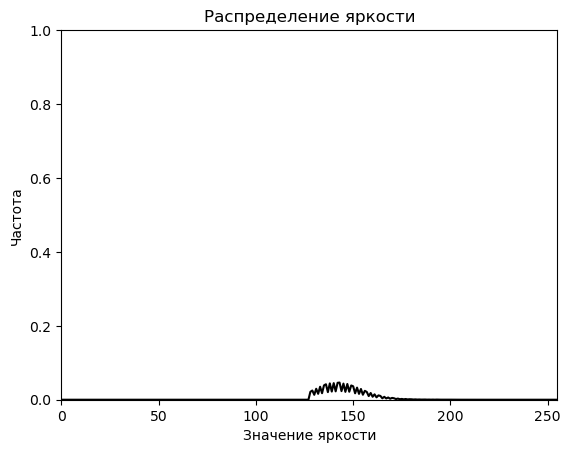

In [26]:
import cv2
import numpy as np
# Считываем изображение
image = cv2.imread(r'C:\Users\abely\OneDrive\Desktop\tomography\tom_snimki\3660.20-3660.95_01004.bmp')


# Преобразуем изображение в оттенки серого
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Применяем бинаризацию для выделения контура
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Ищем контуры в изображении
contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Выбираем самый большой контур
contour = max(contours, key=cv2.contourArea)

# Создаем маску с нулями, такой же формы, как и исходное изображение
mask = np.zeros_like(image)

# Рисуем контур на маске
cv2.drawContours(mask, [contour], 0, (255, 255, 255), thickness=cv2.FILLED)

# Применяем битовую маску для обрезки изображения по контуру
cropped_image = cv2.bitwise_and(image, mask)

# Отображаем изображение и обрезанное изображение
cv2.imshow('Image', image)
cv2.imshow('Cropped Image', cropped_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Вычисляем гистограмму яркости
histogram = cv2.calcHist([cropped_image], [0], threshold, [256], [0, 256])
#histogram = cv2.calcHist([cropped_image],[0],None,[256],[0,256])

# Нормализуем гистограмму
histogram_normalized = histogram / histogram.sum()

# Создаем массив значений яркости
brightness = np.arange(0, 256)

# Построение графика распределения яркости
plt.plot(brightness, histogram_normalized, color='black')
plt.xlabel('Значение яркости')
plt.ylabel('Частота')
plt.title('Распределение яркости')
plt.xlim([0, 255])
plt.ylim([0, 1])
plt.show()



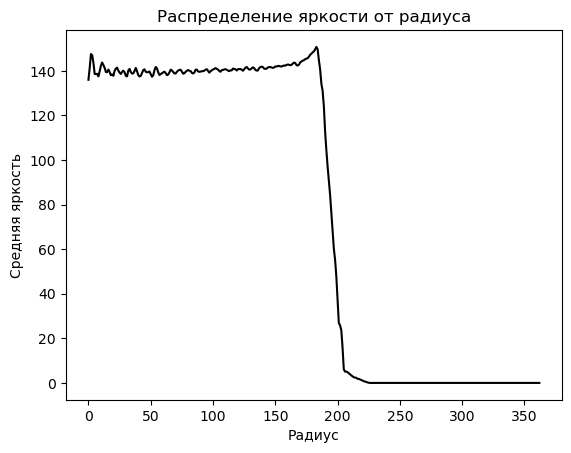

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



# Рассчитываем расстояние каждого пикселя до центра изображения
h, w = img.shape[:2]
center = (w // 2, h // 2)
y, x = np.indices((h, w))
radii = np.sqrt((x - center[0]) ** 2 + (y - center[1]) ** 2)

# Рассчитываем среднюю яркость для каждого радиуса
unique_radii = np.unique(radii.astype(int))
brightness = []
for radius in unique_radii:
    mask = radii.astype(int) == radius
    average_brightness = np.mean(img[mask])
    brightness.append(average_brightness)

# Построение графика распределения яркости от радиуса
plt.plot(unique_radii, brightness, color='black')
plt.xlabel('Радиус')
plt.ylabel('Средняя яркость')
plt.title('Распределение яркости от радиуса')
plt.show()

In [25]:
unique_radii

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



# Преобразуем изображение в оттенки серого
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Применяем детектор кругов Хафа
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=50,
                           param1=50, param2=30, minRadius=0, maxRadius=0)

if circles is not None:
    # Преобразуем координаты и радиусы окружностей в целочисленные значения
    circles = np.round(circles[0, :]).astype(int)

    # Находим окружность с максимальным радиусом
    max_radius = 0
    max_circle = None
    for circle in circles:
        radius = circle[2]
        if radius > max_radius:
            max_radius = radius
            max_circle = circle

    if max_circle is not None:
        # Извлекаем координаты и радиус максимальной окружности
        center_x, center_y = max_circle[0], max_circle[1]
        radius = max_circle[2]

        # Рисуем окружность на изображении
        cv2.circle(img, (center_x, center_y), radius, (0, 255, 0), 2)

        # Выводим информацию о центре и радиусе окружности
        print('Центр окружности: x =', center_x, ', y =', center_y)
        print('Радиус окружности:', radius)
    else:
        print('На изображении не обнаружено окружностей')
else:
    print('На изображении не обнаружено окружностей')

# Отображаем изображение с нарисованной окружностью
cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


Центр окружности: x = 2 , y = 508
Радиус окружности: 389


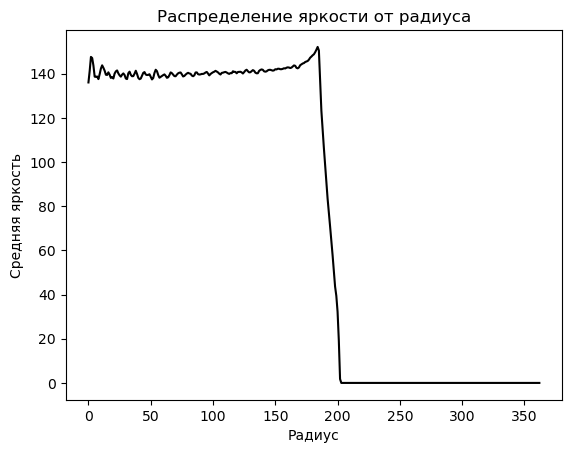

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



# Рассчитываем расстояние каждого пикселя до центра изображения
h, w = cropped_image.shape[:2]
center = (w // 2, h // 2)
y, x = np.indices((h, w))
radii = np.sqrt((x - center[0]) ** 2 + (y - center[1]) ** 2)

# Рассчитываем среднюю яркость для каждого радиуса
unique_radii = np.unique(radii.astype(int))
brightness = []
for radius in unique_radii:
    mask = radii.astype(int) == radius
    average_brightness = np.mean(cropped_image[mask])
    brightness.append(average_brightness)

    
# Построение графика распределения яркости от радиуса
plt.plot(unique_radii, brightness, color='black')
plt.xlabel('Радиус')
plt.ylabel('Средняя яркость')
plt.title('Распределение яркости от радиуса')
plt.show()



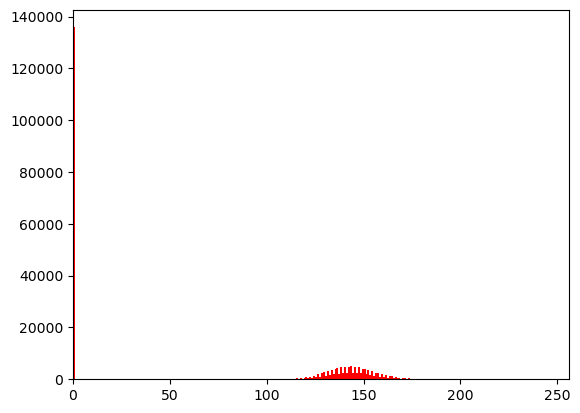

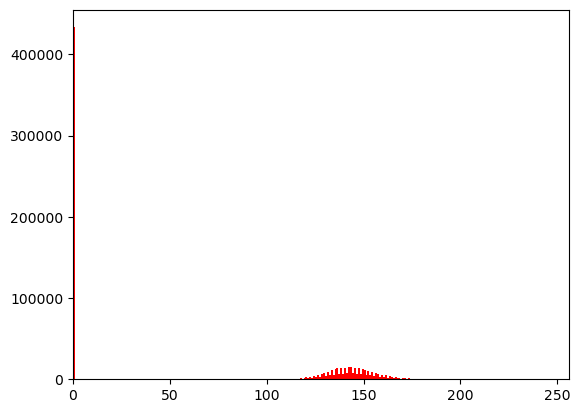

C:\Users\abely\AppData\Local\Temp\ipykernel_5112\1617143597.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cropped_image, hist=True, kde=False,


<Axes: >

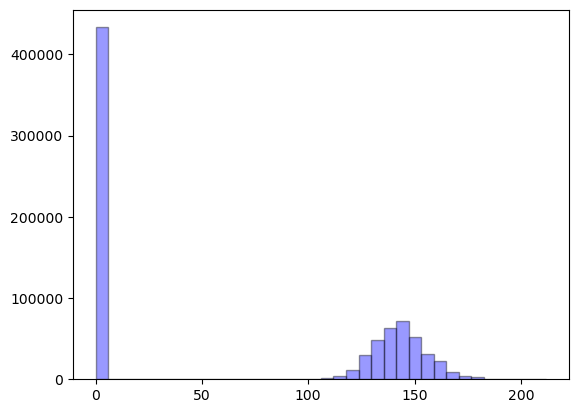

In [5]:
import cv2
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
img = cv2.imread(r'C:\Users\abely\OneDrive\Desktop\tomography\tom_snimki\3660.20-3660.95_01004.bmp',0) #open image
hist,bins = np.histogram(cropped_image.flatten(), 256, [0, 256]) #histogram
plt.hist(img.flatten(), 256, [0,256], color = 'r')
plt.xlim([0, 256])
plt.show()
hist,bins = np.histogram(cropped_image.flatten(), 256, [0, 256]) #histogram
plt.hist(cropped_image.flatten(), 256, [0,256], color = 'r')
plt.xlim([0, 256])
plt.show()
sns.distplot(cropped_image, hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [8]:
cv2.imshow('Contour image', threshold)